In [7]:
% some housekeeping stuff
register_graphics_toolkit ("gnuplot");
available_graphics_toolkits ();
graphics_toolkit ("gnuplot")
clear
% end of housekeeping

# Complexometric titration 

Imagine titrating 100 mL of 0.01 M CuCl2 with 0.1 M EDTA at a pH of 10.  

The equivalence point will be at 10.00 mL.  Same as all the other example titrations we have done (I pick the same conditions each time to emphasize that all titrations are really the same.  The specific reaction does not really matter).  Remember the equivalence point is just a stoichiometric addition of titrant to the initial amount of analyte.  The reaction is 1:1 so when we have added 0.01 mol/L * 0.1 L = 0.001 mol of titrant we have equivalence.

We need to determine the K$_f^\prime$ value for Cu$^{2+}$ at these conditions.

$$K_f^\prime = K_f \times \alpha_L$$

The expression for $\alpha_L$ is ... (see page 277 of text)

$$\alpha_L = \dfrac{K_{a1}K_{a2}K_{a3}K_{a4}K_{a5}K_{a6}}{[H^+]^6+[H^+]^5K_{a1}+[H^+]^4K_{a1}K_{a2}+[H^+]^3K_{a1}K_{a2}K_{a3}+[H^+]^2K_{a1}K_{a2}K_{a3}K_{a4}+[H^+]K_{a1}K_{a2}K_{a3}K_{a4}K_{a5}+K_{a1}K_{a2}K_{a3}K_{a4}K_{a5}K_{a6}}$$
    
    

In [8]:
logKf=17.76
Kf=10^logKf;
pH=6; H=10^-pH;
Ka1=10^0; Ka2=10^-1.5; Ka3=10^-2.00; Ka4=10^-2.69; Ka5=10^-6.15; Ka6=10^-10.37;
%Ka1=1.02e-2; Ka2=2.14e-3; Ka3=6.92e-7; Ka4=5.50e-11;
alpha=(Ka1*Ka2*Ka3*Ka4*Ka5*Ka6)/(H^6+(H^5)*Ka1+(H^4)*Ka1*Ka2+(H^3)*Ka1*Ka2*Ka3+(H^2)*Ka1*Ka2*Ka3*Ka4+H*Ka1*Ka2*Ka3*Ka4*Ka5+Ka1*Ka2*Ka3*Ka4*Ka5*Ka6)
Kfprime=Kf*alpha;
logKfprime=log10(Kfprime)

logKf = 17.760
alpha = 1.7676e-05
logKfprime = 13.007


# titration curve

a=K$_f$

b=K$_f$L$_T$-M$_T$K$_f$+1

c=-M$_T$

We can solve for every point using this quadratic.

To sketch though we can use just 3 points.  0, Ve and 2Ve.

<b>at 0 added EDTA</b> the first point log[Cu$^{2+}$] is just the initial concentration of copper (0.01M)

At equiv. point (Ve) we can think of the K$_f$ expression

$$K_f^{\prime} = \dfrac{[ML]}{[M]\times[L]}$$

<b>At equiv</b> [M]=[L] and since all the metal is complexed [ML]=MT so at the equiv point 

$$K_f^{\prime} = \dfrac{M_T}{[M]^2}$$

rearrange

$$[M] = \sqrt{\left(\dfrac{M_T}{K_f^\prime}\right)}$$

<b>At 2Ve</b> [ML]=[L] because we have just as much excess EDTA added as the amount that complexed to the metal.  So from K$_f$ we can see

$$[M] = \dfrac{1}{K_f^\prime}$$

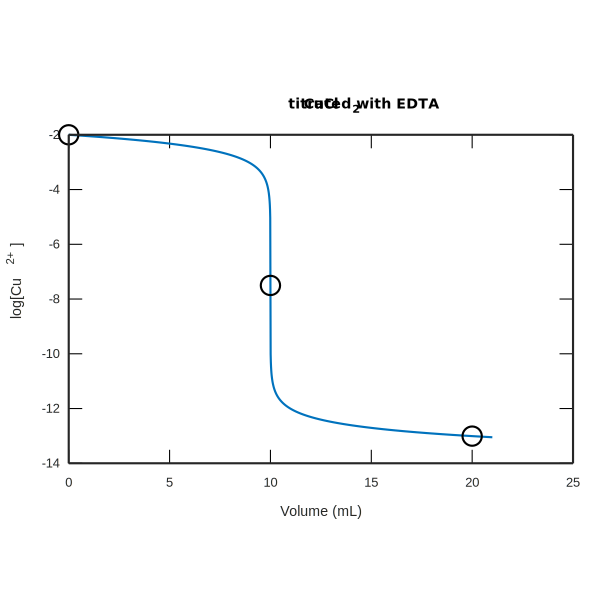

In [9]:
%plot -s 600,600 -f 'svg'
CuTinitial=0.01; VT=0.100; EDTAstockconc=0.1;
volume=0:0.01:21; volume=volume./1000; %convert mL to L. 

EDTAT=(volume*EDTAstockconc)./(VT+volume);
CuT=(CuTinitial*VT)./(VT+volume); % correct for dilution

for i=1:length(EDTAT)
    a=Kfprime; b=EDTAT(i)*Kfprime-CuT(i)*Kfprime+1; c=-CuT(i);
    t=roots([a b c]); %finds the roots
    t=t(imag(t)==0); %sets any imaginary roots to zero
    t=t(t>0); % just the positive real root
    logM(i)=log10(t);
end


plot(volume*1000,logM,'linewidth',2); xlabel('Volume (mL)'); ylabel('log[Cu^{2+}]')
set(gca,'fontsize',11,'linewidth',2)
title('CuCl_2 titrated with EDTA')

hold on
plot([0 10 20],[log10(CuTinitial) log10(sqrt(CuTinitial/Kfprime)) log10(1/Kfprime)],'ko')

set(gca,'fontsize',12)
